# Improve image quality using RandomForestRegressor

In [1]:
%matplotlib inline

In [2]:
# load fix, scikit libraries here
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from scipy.misc import imread
from scipy.ndimage.filters import gaussian_filter
from skimage import feature, color
from skimage.morphology import dilation, erosion
from matplotlib.pyplot import imshow
# load regressor libraries here 
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import os
import urllib
import numpy as np
import nibabel as nib


### Load the base class to load data

In [3]:
from Base import Base

### Load the train and test data
* train data and test data are same images just with different noise factor.(5% here)

In [4]:
trainy = Base(imgaddr = "../data/train/t1_icbm_normal_1mm_pn0_rf0.mnc.gz")
trainx = Base(imgaddr = "../data/train/t1_icbm_normal_1mm_pn5_rf0.mnc.gz") 

testy = Base(imgaddr = "../data/train/t1_icbm_normal_1mm_pn0_rf0.mnc.gz")
testx = Base(imgaddr = "../data/train/t1_icbm_normal_1mm_pn5_rf0.mnc.gz") 

### Train data
* 3 2D Slices of brain image
### Test Data
* 2 2D Slices of brain image

In [5]:
sindex = 100 # starting images are just 
trainy.img = trainy.img[:, :, sindex: sindex + 5][:, :, ::2]
trainx.img = trainx.img[:, :, sindex: sindex + 5][:, :, ::2]

In [6]:
testy.img = testy.img[:, :, sindex: sindex + 5][:, :, 1::2]
testx.img = testx.img[:, :, sindex: sindex + 5][:, :, 1::2]

In [7]:
trainx.getImgShape()

(181, 217, 3)

### Patch size

In [8]:

x = 31
y = 31
z = 1


In [9]:
trainx.splitimage(X = x, Y = y, Z = z)
trainy.splitimage(X = x, Y = y, Z = z)

In [10]:
testx.splitimage(X = x, Y = y, Z = z)
testy.splitimage(X = x, Y = y, Z = z)

### Function to shaow list of images side by side

In [11]:
def show2img(limg, chnl = None, figsize = (10, 10)):
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    if chnl == None: # 2d image show by just concat
        imgs = tuple([x.squeeze() for x in limg])
        ax.imshow(np.concatenate(imgs, axis = 1), cmap='Greys_r')
    else:
        imgs = tuple([x[:, :, chnl] for x in limg])
        ax.imshow(np.concatenate(imgs, axis = 1), cmap='Greys_r')
    plt.show()


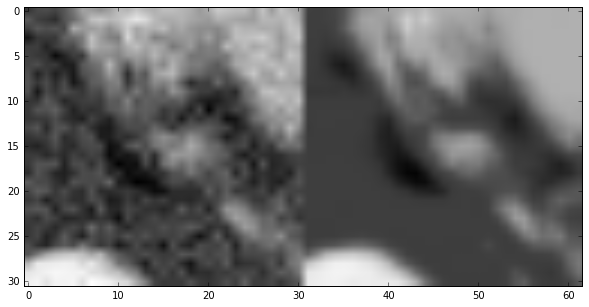

In [12]:
show2img([trainx.index2patch[10], trainy.index2patch[10]])


#### Get train data.
#### Flatten images

In [13]:
trainX = np.array(trainx.index2patch.values())
trainY = np.array(trainy.index2patch.values())

In [14]:
train_X = trainX.reshape((trainX.shape[0], np.prod(trainX.shape[1:])))
train_Y = trainY.reshape((trainY.shape[0], np.prod(trainY.shape[1:])))

In [15]:
trainX.shape

(126, 31, 31, 1)

## Random forest regressor model

In [16]:
model = RandomForestRegressor()
model.fit(train_X, train_Y,)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [17]:
testX = np.array(testx.index2patch.values())
testY = np.array(testy.index2patch.values())
test_X = testX.reshape((testX.shape[0], np.prod(testX.shape[1:])))
test_Y = testY.reshape((testY.shape[0], np.prod(testY.shape[1:])))

In [18]:
pred_Y = model.predict(test_X)
pred_Y = pred_Y.reshape((pred_Y.shape[0], x,y,z))

In [19]:
pred_Y.shape

(84, 31, 31, 1)

### see reconstruction of images here

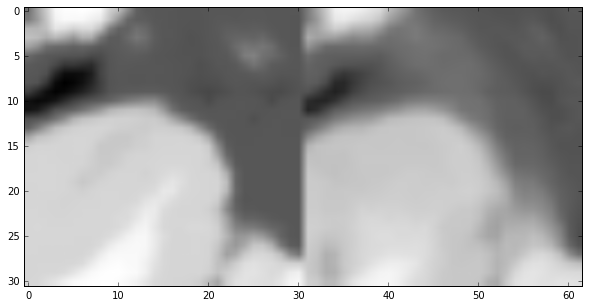

In [20]:
k = 5
show2img([testY[k], pred_Y[k]])

In [21]:
predy = testy

In [22]:
predy.index2patch = dict(enumerate(pred_Y))
predy.patches_to_image()

#### BUG :Some issue with concatenating patches, which I'll resovle

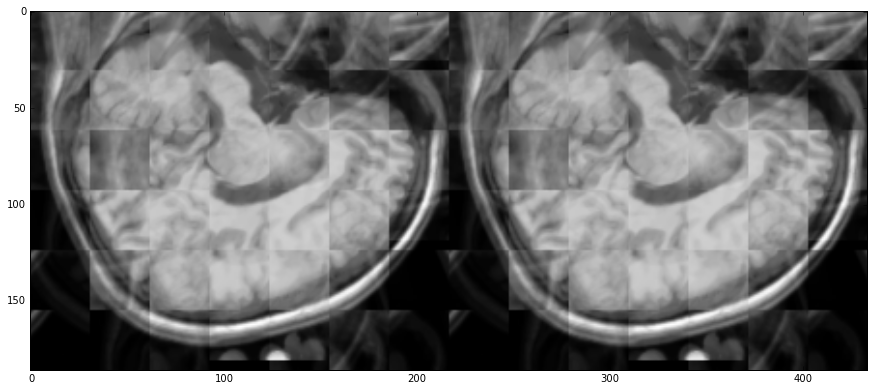

In [23]:
show2img([predy.img, testy.img],chnl=0,figsize = (15, 15))

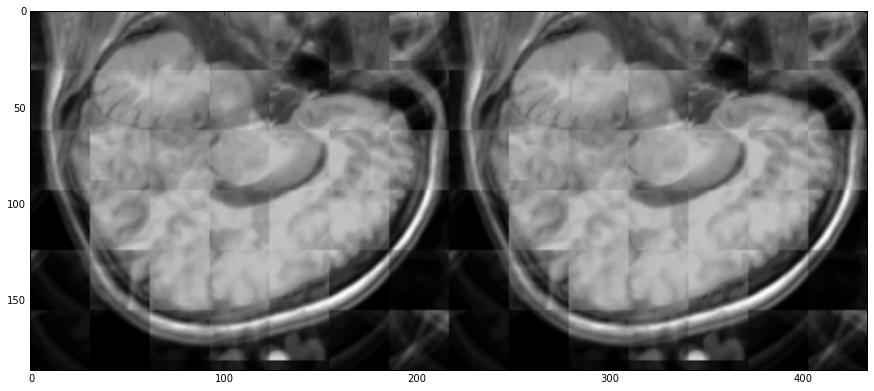

In [24]:
show2img([predy.img, testy.img],chnl=1,figsize = (15, 15))